# Clustering Countries - Indirect Effects

In [129]:
%matplotlib notebook

from IPython.display import display_html 

from tools import Preprocessing, Clustering, benchClustering, plotBarh

import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
from scipy.cluster import hierarchy


from fancyimpute import KNN

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tl

import matplotlib as mpl
import matplotlib.pyplot as plt
import bqplot as bqp
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pylab

import ipyvolume as ipv
from ipywidgets import FloatSlider, ColorPicker, VBox, jslink


sns.set(context='notebook', style='whitegrid', font='sans-serif',
        palette='muted', font_scale=1, color_codes=True, rc=None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 10000)

In [130]:
on_PC = 0
n_init = 10

In [131]:
# import the csv dataset as a pandas DataFrame
# df = pd.read_csv('data/full_data.csv')
#df.columns
# list(df.columns)

"**Indirect effects** occur to industries in the backward­linked industries that supply the exporting firm." [Wayne P. Miller]

So, what does the indirect economic impact of an **off-shore oil platform** depends upon?


1. **Development of the oil sector** of the country
     - Hp: the more developed the  oil industry is, the higher the availability of specialized suppliers
     
 
2. **Industrial development of the country**
     - Hp: the more industrialized the country is, the higher the likelihood that suppliers will source locally
     
 
3. Level of **import** of goods and services
     - Hp: the more the country is open to import, the lower the likelihood that suppliers will source locally

### Variabili di aggregazione

1. Production of Oil, 2016 [bdp] 
2. Import of Goods and Services w.r.t. GDP, 2014-2016 average
3. MVAsh : GDP's share of Manufactoring Value Added , 2015

All these variables have been standardized for clustering.

In [133]:
varlist = [
    'Production_Oil_bpd_2016',
    'ImportGoodsServices_%GDP',
    'MVAsh%_2015',
#    'MVApc_constantUS$_2015',
#   'Production_Oil_bpd_2014',
#   'Production_Oil_bpd_2015',
#   'MHMVAsh%_2015', ???
          ]

In [134]:
prep = Preprocessing('data/full_data.csv',
                     varlist=varlist, verbose=True)
prep.exportCSV('data/cleaned_data_petroleum.csv', impute=True)

MISSING VALUES FOR EACH FEATURE:
MVAsh%_2015                 3
ImportGoodsServices_%GDP    1
dtype: int64 

MISSING VALUES FOR EACH COUNTRY:
Country Code
TKM    2
TLS    1
LBY    1
dtype: int64


In [151]:
x[:, 0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.60000000e-01,
       2.00000000e+00, 3.80000000e+01, 4.90000000e+01, 4.92377049e+01,
       7.06748634e+01, 8.55027322e+01, 9.83606557e+01, 1.97996325e+02,
       2.10819672e+02, 2.30778689e+02, 2.89748634e+02, 3.01849727e+02,
       3.84685792e+02, 5.48420765e+02, 6.15734973e+02, 8.31620219e+02,
       9.33022544e+02, 1.00684057e+03, 1.34836066e+03, 1.59519945e+03,
       1.64797541e+03, 1.76961475e+03, 1.87120492e+03, 2.18687432e+03,
       2.27696721e+03, 3.10607650e+03, 3.98065027e+03, 4.45151639e+03,
       8.83975971e+03])

<IPython.core.display.Javascript object>


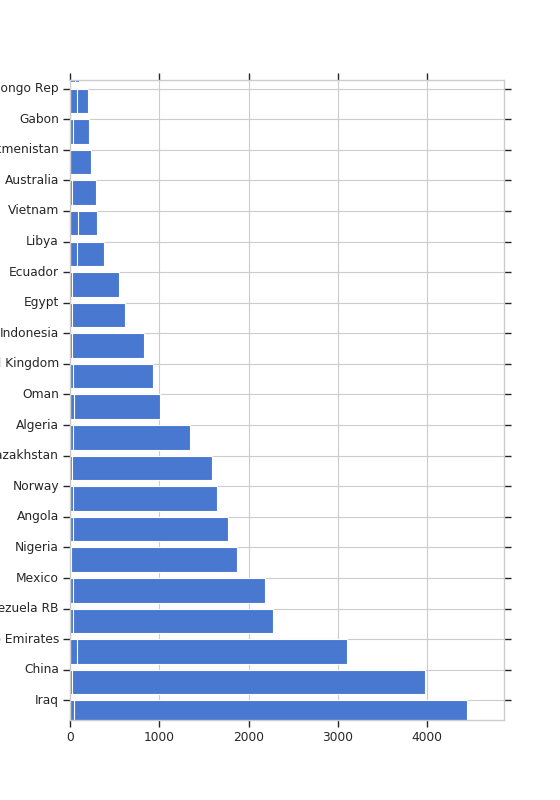

<IPython.core.display.Javascript object>


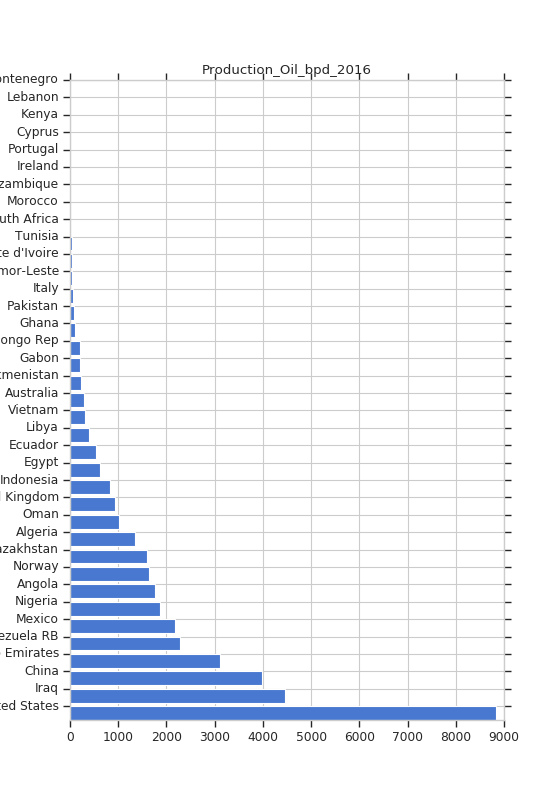

<IPython.core.display.Javascript object>


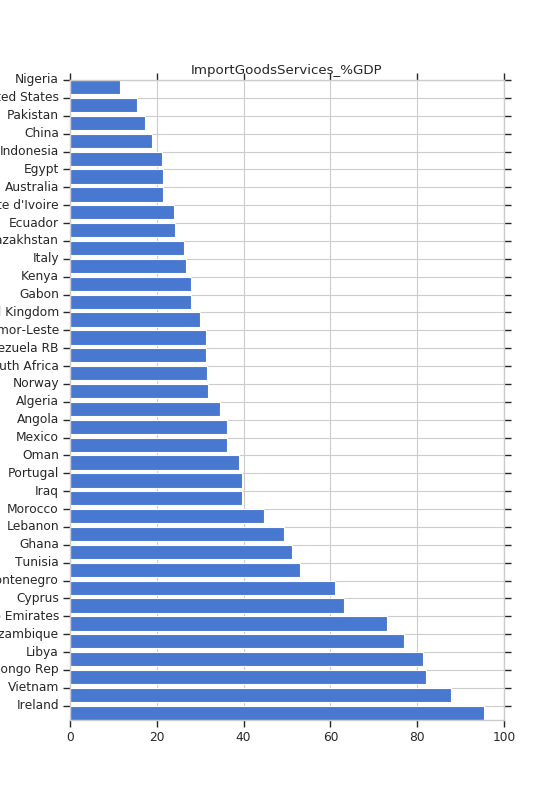

<IPython.core.display.Javascript object>


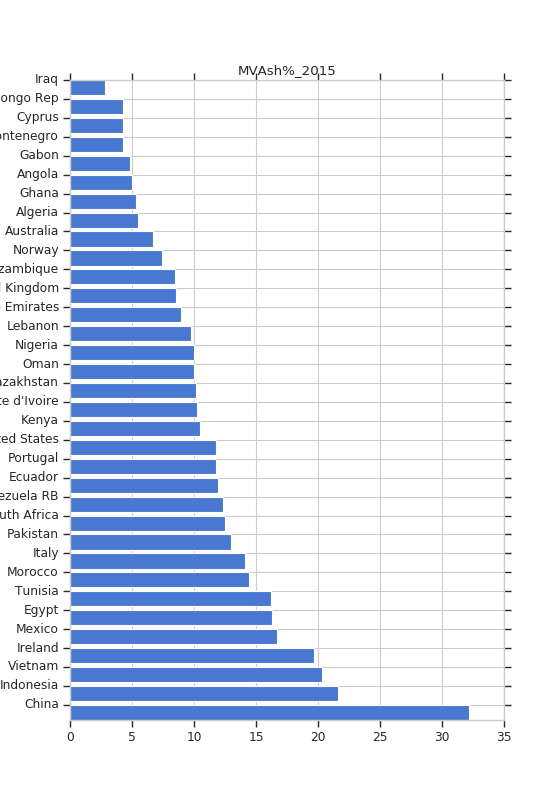

In [135]:
for c in prep.df.columns[1:]:
    plotBarh(df=prep.df, by_column=c )

CUMULATIVE PROPORTION OF VARIANCE EXPLAINED BY PCs


<IPython.core.display.Javascript object>


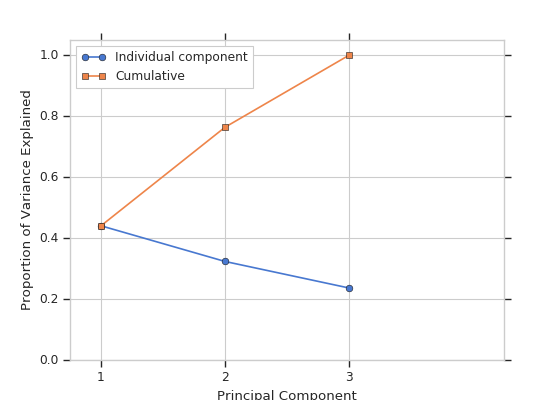

<IPython.core.display.Javascript object>


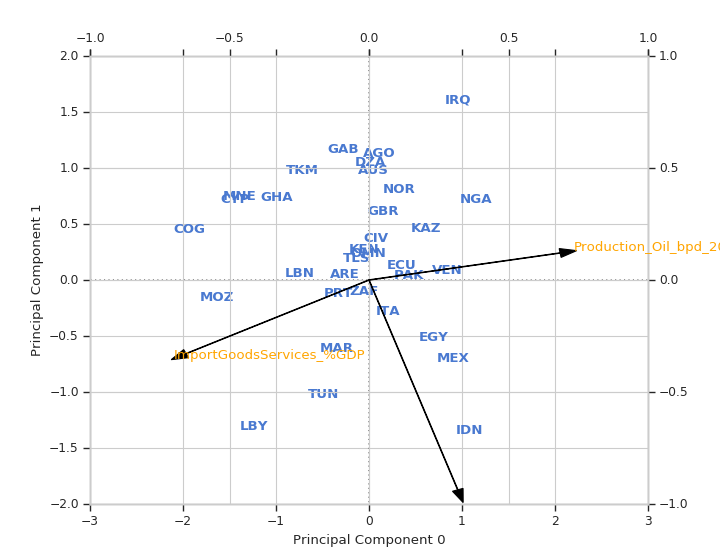

In [132]:
data = Clustering('data/cleaned_data_petroleum.csv', verbose=False)
data.getPC()
data.plotAlongPC(pc1=0, pc2=1, xlim=[-3, 3], ylim=[-2, 2], loadings=True, clustering=None)

<IPython.core.display.Javascript object>


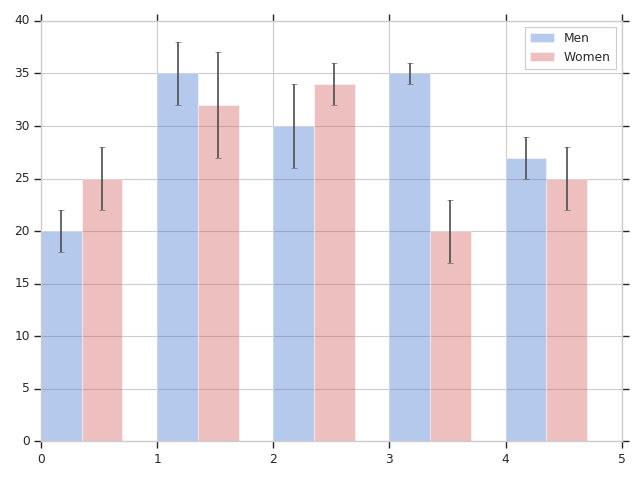

In [161]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()


In [169]:
np.float(i)

0.0

<IPython.core.display.Javascript object>


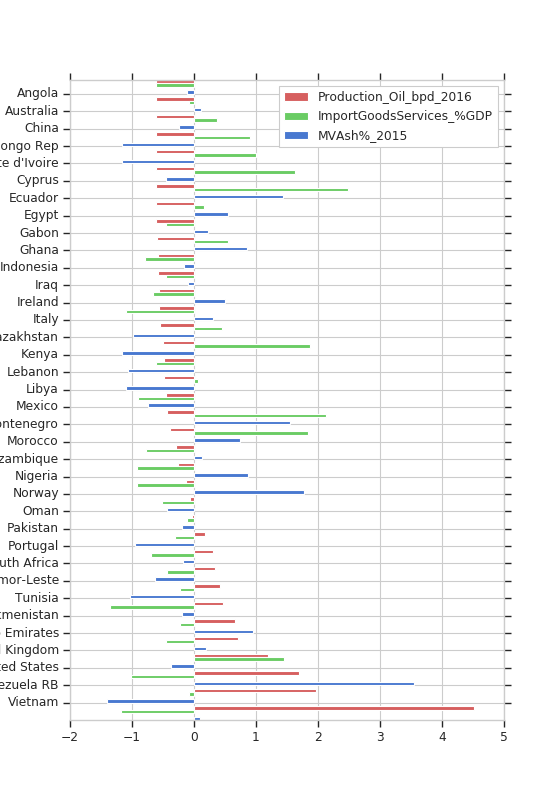

In [177]:
df = data.df
by_columns = ['Production_Oil_bpd_2016','ImportGoodsServices_%GDP', 'MVAsh%_2015']

newdf = df.sort_values(by=by_columns)
x = np.array(newdf[by_columns])
y = np.array(data.country_names)
y_pos = np.arange(len(y))

fig, ax = plt.subplots(figsize=(7, 10))

ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('%GDP')
# ax.set_title(by_column)
bar_width = 0.2
width = 0.2
colors = list('rgby')
for i in range(x.shape[1]):
    ax.barh(y_pos + width, x[:, i], bar_width,
            color=colors[i], label=by_columns[i])
    width += width
    
ax.legend()

In [137]:
x = data.df.iloc[:, 0]
y = data.df.iloc[:, 1]
z = data.df.iloc[:, 2]
print('x = ', x.name)
print('y = ', y.name)
print('z = ', z.name)

selected = None
ipv.figure()
scatter = ipv.pylab.scatter(x, y, z, marker="sphere", color = 'red', size=5, size_selected=8, selected=selected)
# ipv.pylab.xyzlabel(x.name, y.name, z.name)

size = FloatSlider(min=0, max=30, step=0.1)
size_selected = FloatSlider(min=0, max=30, step=0.1)
color = ColorPicker()
color_selected = ColorPicker()
jslink((scatter, 'size'), (size, 'value'))
jslink((scatter, 'size_selected'), (size_selected, 'value'))
jslink((scatter, 'color'), (color, 'value'))
jslink((scatter, 'color_selected'), (color_selected, 'value'))
VBox([ipv.gcc(), size, size_selected, color, color_selected])

x =  Production_Oil_bpd_2016
y =  ImportGoodsServices_%GDP
z =  MVAsh%_2015


<IPython.core.display.Javascript object>


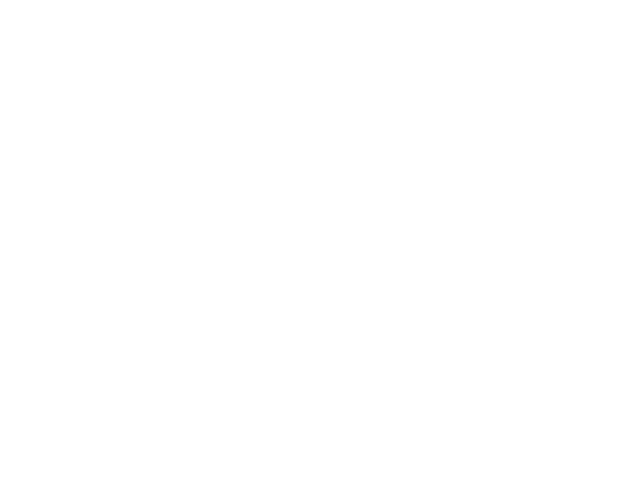

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



In [9]:
k_min = 5
k_max = 30
silh, calha = data.multipleKmeans(k_min=5, k_max=30, on_PC=0, n_init=n_init)

In [10]:
k_clusters = 10
data.kmeans(n_clusters=k_clusters, on_PC=on_PC)
# data.clusterings['kmeans'+str(n_clusters)]

the minimum BIC is achieved with               23 gaussian components


<IPython.core.display.Javascript object>


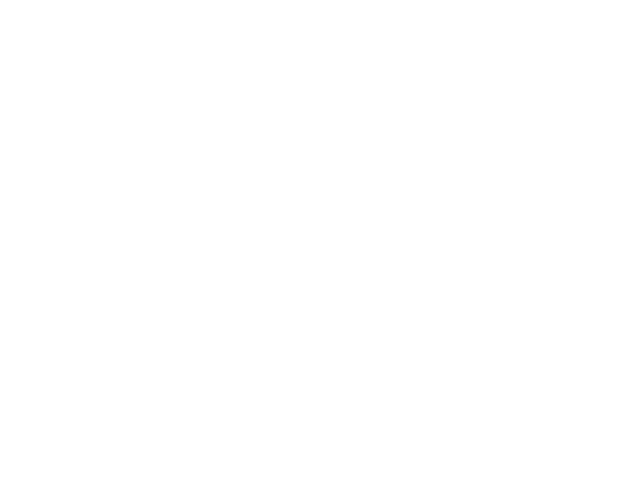

In [11]:
data.gmBIC(n_min=1, n_max=30, covariance_type='full', n_init=n_init, on_PC=on_PC)

In [12]:
n_components = 21
data.gaussianMixture(n_components, covariance_type='full', n_init=n_init, on_PC=0)
data.bayesianGaussianMixture(n_components, covariance_type='full', n_init=n_init, on_PC=0)

Hierarchical clustering with euclidean distance metric.


<IPython.core.display.Javascript object>


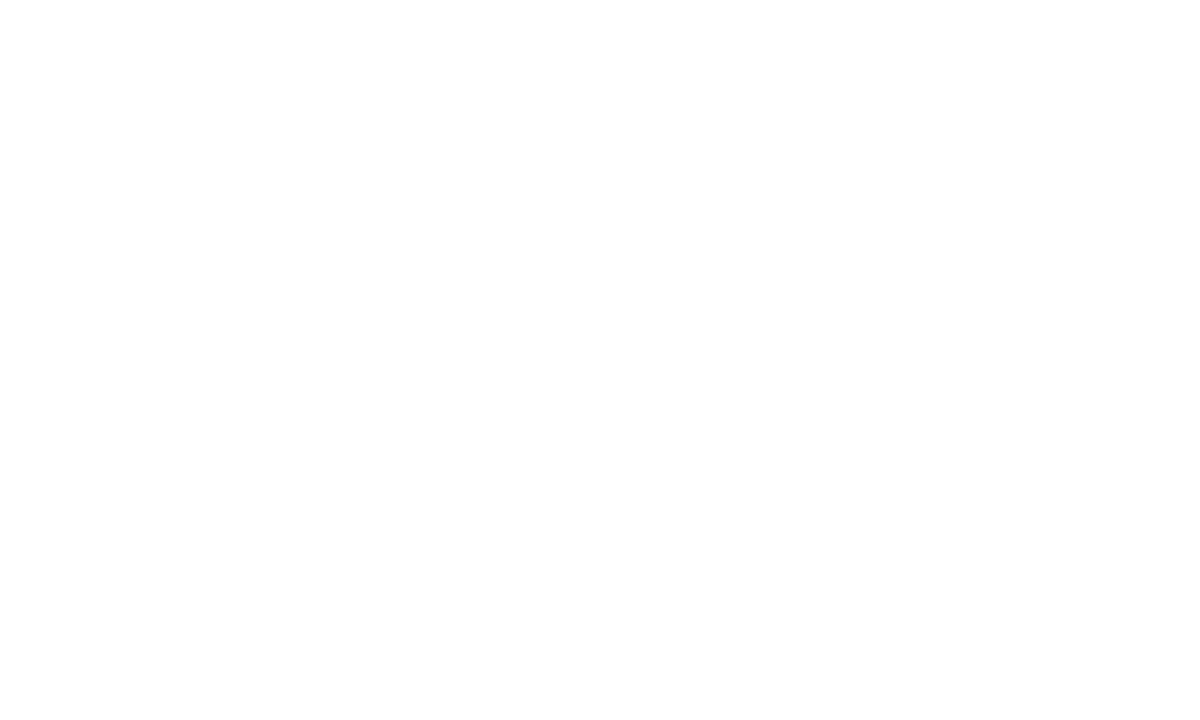

In [13]:
data.hierarchicalClustering(metric='euclidean', method='ward', threshold=1.5, on_PC=0, heatmap=False)

Hierarchical clustering with euclidean distance metric.


<IPython.core.display.Javascript object>


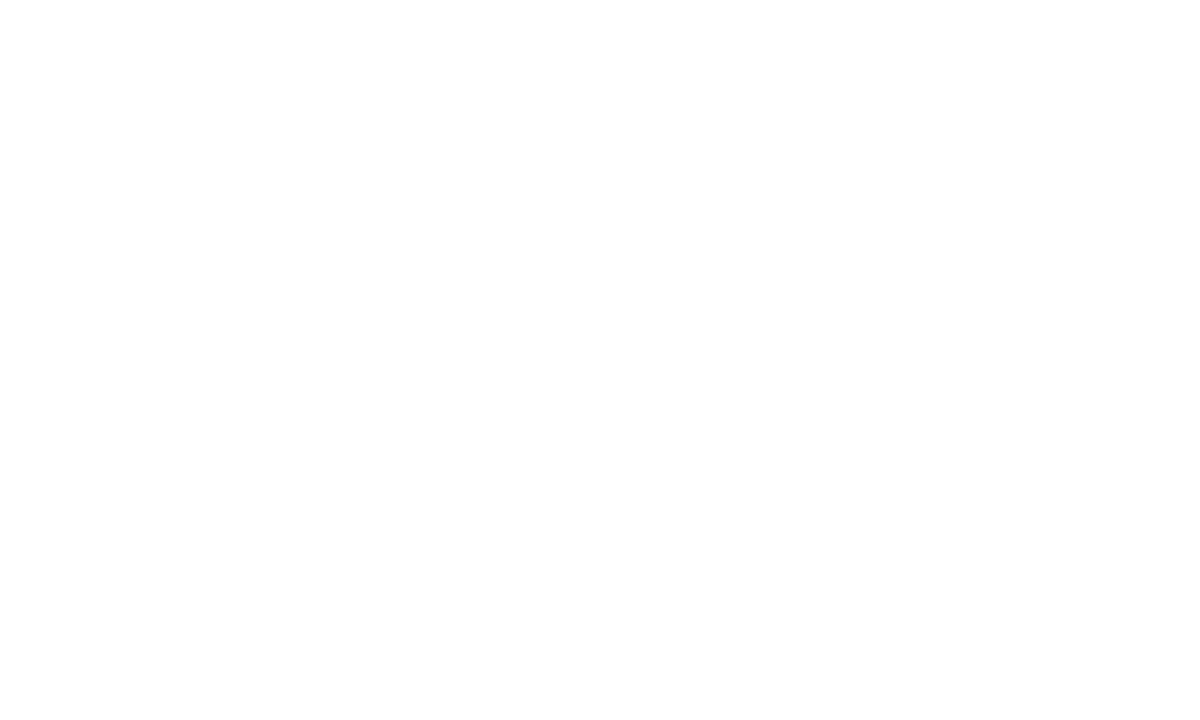

In [14]:
data.hierarchicalClustering(metric='euclidean', method='complete', threshold=1.5, on_PC=on_PC, heatmap=False)

In [15]:
data.clusterings.keys()

dict_keys(['bayesian gm21', 'hierarchical_ward_euclidean', 'kmeans10', 'gm21', 'hierarchical_complete_euclidean'])

In [16]:
# display all clusters together
# newdf = np.zeros(len(data.clusterings.keys()))
styler = []
for k in data.clusterings.keys():
    styler.append(data.clusterings[k].style.set_table_attributes("style='display:inline'"))
display_html(styler[0]._repr_html_() + styler[1]._repr_html_() + styler[2]._repr_html_() + styler[3]._repr_html_() + styler[4]._repr_html_(), raw=True)

,bayesian gm21
Cluster,
0,"['Ireland', 'Libya', 'Vietnam']"
1,"['Algeria', 'Angola', 'Australia', 'Congo Rep', ""Cote d'Ivoire"", 'Cyprus', 'Ecuador', 'Egypt', 'Gabon', 'Ghana', 'Indonesia', 'Italy', 'Kazakhstan', 'Kenya', 'Lebanon', 'Mexico', 'Montenegro', 'Morocco', 'Mozambique', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Portugal', 'South Africa', 'Timor-Leste', 'Tunisia', 'Turkmenistan', 'United Kingdom', 'Venezuela RB']"
2,['China']
3,"['Iraq', 'United Arab Emirates', 'United States']"
,hierarchical_ward_euclidean
Cluster,
1,['China']
2,['United States']
3,"['Mexico', 'Venezuela RB']"


<IPython.core.display.Javascript object>


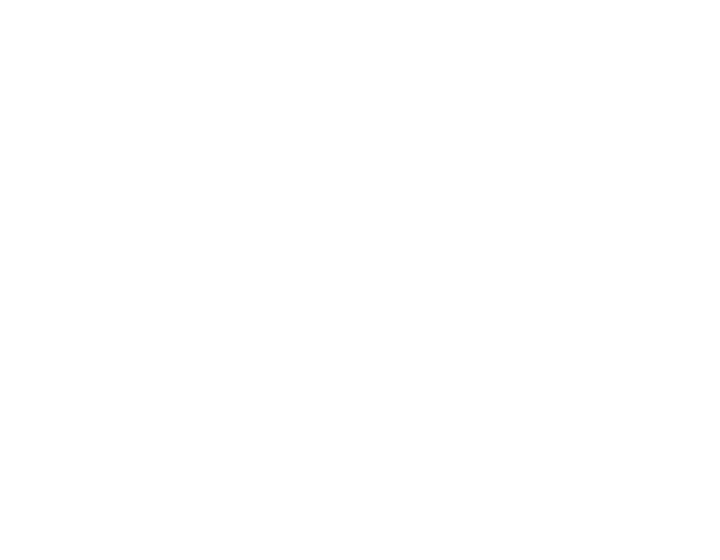

In [17]:
data.plotAlongPC(pc1=0, pc2=1, xlim=[-3, 3], ylim=[-2, 2], loadings=True, clustering='kmeans10')

In [18]:
# data.hdbscan(min_cluster_size=2, on_PC=0)
# data.clusterings['hdbscan']

In [102]:
import sklearn
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools as tl

import numpy as np

from sklearn.cluster import KMeans
from sklearn import datasets

In [21]:
del data.clusterings_labels['hierarchical_ward_euclidean']
del data.clusterings_labels['hierarchical_complete_euclidean']

In [128]:
fig = tl.make_subplots(rows=2, cols=3,
                          print_grid=False,
                          specs=[[{'is_3d': True}, {'is_3d': True}, {'is_3d': True}],
                                 [{'is_3d': True}, None, None]])

X = data.df.values

fignum = 1
for name, labels in data.clusterings_labels.items():
    
    trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],
                         hovertext=data.country_names,
                         name=name,
                         showlegend=True,
                         mode='markers',
                         marker=dict(
                             cauto=True,
                             color=labels.astype(np.float),
                             colorscale='Rainbow',
                             line=dict(color='black', width=1)),
                         hoverlabel=dict(bgcolor='red'))
    fig.append_trace(trace, row=1, col=fignum)
    fignum = fignum + 1


fig['layout'].update(height=900, width=900)

fig['layout']['scene'].update(annotations=[dict(z=4, text='gmm21', showarrow=False)])
fig['layout']['scene1'].update(annotations=[dict(z=4, text='gmm21', showarrow=False)])
fig['layout']['scene2'].update(annotations=[dict(z=4, text='gmm21', showarrow=False)])
fig['layout']['scene3'].update(annotations=[dict(z=4, text='gmm21', showarrow=False)])
fig['layout']['scene4'].update(annotations=[dict(z=4, text='gmm21', showarrow=False)])
# fig['layout']['scene5'].update(annotations=[dict(z=4, text='gmm21', showarrow=False)])
# fig['layout']['scene'].update(annotations=[dict(z=4, text='gmm21', showarrow=False)])

py.iplot(fig)

# HOVER CHE FUNZIONANO MA UN SOLO PLOT

In [84]:
# import plotly.plotly as py
# import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/alpha_shape.csv')
# df.head()

# fig = tools.make_subplots(rows=2, cols=3,
#                           print_grid=True,
#                           specs=[[{'is_3d': True}, {'is_3d': True}, {'is_3d': True}],
#                                  [ {'is_3d': True, 'rowspan':1}, None, None]])
# fig = fig.to_dict()
# X = data.df.values

# fignum = 1
# content = []
# for name, labels in data.clusterings_labels.items():
    
#     scatter = dict(
#         mode = "markers",
#         name = name,
#         type = "scatter3d",    
#         x=X[:, 0], y=X[:, 1], z=X[:, 2],
#         marker=dict(
#              cauto=True,
#              color=labels.astype(np.float),
#              colorscale='Rainbow',
#              line=dict(color='black', width=1)),
#         hoverlabel=dict(bgcolor='orange'),
#         hovertext=data.country_names)
    
#     content.append(scatter)

# layout = dict(
#     title = '3d point clustering',
#     scene = dict(
#         xaxis = dict( zeroline=False ),
#         yaxis = dict( zeroline=False ),
#         zaxis = dict( zeroline=False ),
#     ))
# fig = go.Figure(data=content)
# # Use py.iplot() for IPython notebook
# py.iplot(fig, filename='3d point clustering')

This is the format of your plot grid:
[ (1,1) scene1 ]  [ (1,2) scene2 ]  [ (1,3) scene3 ]
[ (2,1) scene4 ]      (empty)           (empty)     



In [ ]:
d_fig = fig.to_dict()
print(type(d_fig))
print(len(d_fig))
print(type(d_fig['data']))
print(len(d_fig['data']))